# Understanding WeRateDogs: A first investigation into our favorite dog tweets!

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#gathering">2. Data Gathering</a></li>
<li><a href="#wrangling">3. Data Wrangling</a></li>
<li><a href="#eda">4. Exploratory Data Analysis and Visualization</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
This project is an investigation into the twitter archive of WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. It has over 4 million followers and has received international media coverage.

The goal of this project is to gather data from different sources (*provided file, programmatically downloaded file* and *file constructed via API*) and formats (`.csv`, `.tsv`, `.txt`), assess the data's quality and tidiness and then clean it - all by using Python and its libraries. In the last step the cleaned data is analyzed to uncover insights from the data and create visualizations of these insights.


The datasets have been provided for analysis as part of [Udacity's Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002).
<br>

In [1]:
# Loading packages
import numpy as np
import pandas as pd
from functools import reduce

import tweepy
from tweepy import OAuthHandler

import json
import requests
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='gathering'></a>
## 2. Data Gathering

In this section of the report the data is gathered using different techniques and loaded into the notebook, before it is wrangled.

### 2.1 Loading the Twitter archive file
The first dataset to be loaded into the notebook as a pandas DataFrame is the Twitter archive file, that has been provided in the classroom.

In [2]:
# Loading the data into a pandas DataFrame.
df_raw = pd.read_csv('twitter-archive-enhanced.csv')
df_raw.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2.2 Downloading the image file programmatically
In addition to the Twitter archive, a link to a table full of image predictions (the top three) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction was provided in the classroom.
<br>
This file is programmatically downloaded into the folder and then loaded into this notebook as a pandas DataFrame.

In [3]:
# Downloading the file into a response variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Downloading into a seperate file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Loading the image data into a pandas DataFrame
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 2.3 Twitter Data, creating and reading in JSON File
As the provided twitter archive is not complete, most notably missing information on retweet count and favorite count, this data needs to be obtained by querying the Twitter API for each tweet's JSON data using the tweet IDs in the WeRateDogs Twitter archive. 
<br><br>
Python's Tweepy library is used for this and each tweet's entire set of JSON data is saved in a filed called  `tweet_json.txt`, with the each tweet's data written to its own line.
<br><br>
Finally, the thus created `tweet_json.txt` file is read line by line into a pandas DataFrame.


#### Accessing the twitter data through the API
> **Note to Reviewer:** I had difficulties setting up the twitter account and thus used the provided dataset in `tweet_json.txt` instead of gathering it directly from twitter. The used Python code is thus copied into this notebook as a mockup in an Markdown Cell to avoid disruption by running the cell.

```python

# NOTE TO REVIEWER - I used the provided dataset instead of gathering directly from twitter (see description above)
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

```

#### Reading in JSON file
After having a look at the structure and content of the first line in `tweet_json.txt`, the file is read line by line into a pandas DataFrame.

In [6]:
# Loading the file into a list
json_data = [json.loads(line) for line in open('tweet-json.txt', 'r')]

In [7]:
# Looking at the firt entry (line) of the json data
json_data[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
# Reading line by line into a pandas DataFrame
df_json = pd.DataFrame(json_data, columns = ['id_str', 'retweet_count', 'favorite_count', 'display_text_range'])
df_json.head(2)

,id_str,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"


<a id='wrangling'></a>
## 3. Data Wrangling

After gathering the different datasets from the different sources and loading them into pandas DataFrames in this notebook, the data is checked for quality and tidiness issues through visual and programmatic assessment methods and the issues documented. They are then cleaned in a copy of the different DataFrames. 
<br><br>
A clean version of the dataset is then saved for ease of further analysis. This way the original dataset is protected from accidental modifications.<br>


### 3.1 General Properties and Assessment of the Datasets

- First step understanding the data first through visual assessment and then programmatic assessment
- During both assessments the dataset is inspected in terms of quality issues (i.e. content issues) and tidiness (i.e. structural issues)
- The observed issues have been documented simultanously and noted under <a href="#document">3.2 Assessment Documentation</a>

#### Assessment Twitter archive

In [9]:
# Visual assessment
df_raw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# Programmatic assessment
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_raw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_raw.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
df_raw['name'].value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [14]:
df_raw['name'].unique()[0:20]

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey'],
      dtype=object)

To keep readability in the notebook, the above two cells only show and selection of the values contained in `df_raw['name']`.

#### Assessment image data

In [15]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessment json data

In [18]:
df_json.head()

,id_str,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [19]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id_str                2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


In [20]:
df_json.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


<a id='document'></a>

### 3.2 Assessment Documentation
Based on the performed visual and programmatic assessment the following observations were made on how to improve quality and tidiness of the data.


#### 3.2.1. Quality Issues

1. Erroneous datatype for `tweet_id` in all DataFrames
##### Twitter archive data
- Retweets are included within the original tweets, visible in columns `retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp`
- Missing data in `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp`, not too interesting for analysis (after retweets removed)
- Erroneous datatype `timestamp`
- Inconsistent data in `rating denominator` and `numerator`: makes comparison difficult
- Inaccurate data in `rating denominator` and `numerator`: maximum values very high
- Inaccurate data in the dog names (`None, a, the, an, quite, such, not, one, getting, all, by, mad, just, actually, this, unacceptable, old, infuriating, officially, life, light, space`)
##### Image data
- Columns names unclear `pi, pi_conf, pi_dog`
- Inconsistent data in prediction columns `p1, p2, p3`
##### JSON data
- Inconsistent data: column heading `id_str`
- Invalid data in `display text range`: `str`-type and difficult to use for analysis


#### 3.2.2. Tidiness Issues
1. Column names `doggo, floofer, pupper, puppo'` are also values
- The `timestamp` column contains two variables: date and time

### 3.3 Defining the Cleaning steps

#### 3.3.1 Quality Issues
The documented quality and tidiness issues will be cleaned as defined below.

1. Convert `tweet_id` in all DataFrames into `str`
##### Twitter archive data
- Drop rows with non-null values in column `retweeted_status_id`
- Drop columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp`
- Convert `timestamp` to `datetime`
- Calculate the fraction of the ratings to make comparison easier
- Drop all ratings > 2.1 to eliminate outliers
- Replace inaccurate data in the dog names (`None, a, the, an, quite, such, not, one, getting, all, by, mad, just, actually, this, unacceptable, old, infuriating, officially, life, light, space`)
##### Image data
- Rename column headers `pi, pi_conf` to `breed_pi, breed_pi_conf`
- Capitalize values in prediction columns `breed_p1, breed_p2, breed_p3`
##### JSON data
- Rename column head `id_str` to `tweet_id`
- Convert `display text range` to lenght of text as an `int`: extrat start and end character count and calculate the difference


#### 3.3.2 Tidiness Issues
1. Create new column `stage` to include the values `doggo, floofer, pupper, puppo'`; then drop columns `doggo, floofer, pupper, puppo'`
- Separate the date and time variables from `timestamp` column


### 3.4 Cleaning the quality issues
In this chapter the documented quality and tidiness issues are cleaned as defined previously.

#### 3.4.1 Cleaning Twitter Archive data

In [21]:
# Create a copy of the DataFrame
df_tweet_clean = df_raw.copy()

To protect the original DataFrame from unwanted modifications, a copy is made on which to perform the cleaning. This copy is named `df_tweet_clean` to indicate that it contains the observations around tweets and in the end it will be a clean DataFrame, that can be included in a relational database.

In [22]:
# Select only original tweets
df_tweet_clean['retweeted_status_id'] = df_tweet_clean['retweeted_status_id'].fillna(1)
df_tweet_clean = df_tweet_clean.query('retweeted_status_id == 1')
df_tweet_clean['retweeted_status_id'].value_counts()

1.0    2175
Name: retweeted_status_id, dtype: int64

In [23]:
# Drop identified columns
lst_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp']

df_tweet_clean.drop(columns= lst_columns, axis=1, inplace=True)

In [24]:
# Changing datatypes for df_tweet_clean
df_tweet_clean['tweet_id'] = df_tweet_clean['tweet_id'].astype(str)
df_tweet_clean['timestamp'] = pd.to_datetime(df_tweet_clean['timestamp'])

In [25]:
#Creating new column for ratings by combining 'rating_numerator' and 'rating_denominator'
df_tweet_clean['rating'] = df_tweet_clean['rating_numerator'] / df_tweet_clean['rating_denominator']

In [26]:
# Drop entries where ratings > 2.1 
df_tweet_clean.drop(df_tweet_clean.index[df_tweet_clean['rating'] > 2.1], inplace = True)

In [27]:
# Replace inaccurate dog names
lst_names = ['None','a', 'the', 'an', 'quite', 'such', 'not', 'one', 'getting', 'all', 'by', 'mad', 'just',
            'actually', 'this', 'unacceptable', 'old', 'infuriating', 'officially', 'life', 'light', 'space']

for n in lst_names:
    df_tweet_clean.replace(to_replace=n, value=0, inplace=True)

In [28]:
# Reordering the columns
df_tweet_clean = df_tweet_clean.reindex(columns=['tweet_id', 'timestamp', 'rating', 'rating_numerator', 
                                                 'rating_denominator']+ list(df_tweet_clean.columns[2:4])
                                        + list(df_tweet_clean.columns[7:-1]))

In [29]:
df_tweet_clean.head(2)

,tweet_id,timestamp,rating,rating_numerator,rating_denominator,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,0,0,0,0


#### 3.4.2 Cleaning image prediction data

In [30]:
# Create a copy of the DataFrame
df_image_clean = df_image.copy()

In [31]:
# Converting datatype
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

In [32]:
# Change column headers `pi, pi_conf, pi_dog` to `probi, probi_conf, probi_dog`
df_image_clean = df_image_clean.rename(columns={'p1':'breed_p1','p1_conf':'breed_p1_conf','p1_dog':'p1_dog',
                                                 'p2':'breed_p2','p2_conf':'breed_p2_conf','p2_dog':'p2_dog',
                                                 'p3':'breed_p3','p3_conf':'breed_p3_conf','p3_dog':'p3_dog',
                                                })

In [33]:
df_image_clean.head(2)

,tweet_id,jpg_url,img_num,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [34]:
df_image_clean['breed_p1'] = df_image_clean['breed_p1'].apply(lambda x: x.capitalize())

#### 3.4.3 Cleaning JSON data

In [35]:
# Create a copy of the DataFrame
df_json_clean = df_json.copy()

In [36]:
# Renaming column heading
df_json_clean = df_json_clean.rename(columns={'id_str':'tweet_id'})
df_json_clean.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"


In [37]:
# Separate the display_text_range (this is maybe tidying? But not really)
df_json_clean['start_text'] = df_json_clean['display_text_range'].str[0:1].str.get(0)
df_json_clean['end_text'] = df_json_clean['display_text_range'].str[1:2].str.get(0)

df_json_clean['tweet_length'] = df_json_clean['end_text'] - df_json_clean['start_text']

In [38]:
df_json_clean.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range,start_text,end_text,tweet_length
0,892420643555336193,8853,39467,"[0, 85]",0,85,85
1,892177421306343426,6514,33819,"[0, 138]",0,138,138


In [39]:
# Drop columns
df_json_clean.drop(columns= ['display_text_range', 'start_text', 'end_text'], axis=1, inplace=True)

### 3.5 Cleaning Tidyness issues


#### 3.5.1 Creating tweet data table

In [40]:
# Separate the dog data from the tweet data
df_d = df_tweet_clean[['tweet_id','name', 'doggo', 'floofer', 'pupper', 'puppo']].copy()
df_d.head(2)

,tweet_id,name,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,0,0,0,0
1,892177421306343426,Tilly,0,0,0,0


In [41]:
# Drop the df_d part in the DataFrame
df_tweet_clean.drop(columns = df_tweet_clean.columns[7:], axis=1, inplace=True)
df_tweet_clean.head(2)

,tweet_id,timestamp,rating,rating_numerator,rating_denominator,source,text
0,892420643555336193,2017-08-01 16:23:56,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....


In [42]:
# Add json tweet data
df_tweet_clean = df_tweet_clean.join(df_json_clean.set_index('tweet_id'), on='tweet_id')
df_tweet_clean.head(2)

,tweet_id,timestamp,rating,rating_numerator,rating_denominator,source,text,retweet_count,favorite_count,tweet_length
0,892420643555336193,2017-08-01 16:23:56,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,85
1,892177421306343426,2017-08-01 00:17:27,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,138


In [43]:
df_tweet_clean['date'] = [d.date() for d in df_tweet_clean['timestamp']]
df_tweet_clean['time'] = [d.time() for d in df_tweet_clean['timestamp']]

In [44]:
df_tweet_clean.head(2)

,tweet_id,timestamp,rating,rating_numerator,rating_denominator,source,text,retweet_count,favorite_count,tweet_length,date,time
0,892420643555336193,2017-08-01 16:23:56,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,85,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,138,2017-08-01,00:17:27


In [45]:
df_tweet_clean.drop('timestamp', axis=1, inplace=True)

In [46]:
df_tweet_clean.head()

,tweet_id,rating,rating_numerator,rating_denominator,source,text,retweet_count,favorite_count,tweet_length,date,time
0,892420643555336193,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,85,2017-08-01,16:23:56
1,892177421306343426,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,138,2017-08-01,00:17:27
2,891815181378084864,1.2,12,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461,121,2017-07-31,00:18:03
3,891689557279858688,1.3,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908,79,2017-07-30,15:58:51
4,891327558926688256,1.2,12,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048,138,2017-07-29,16:00:24


In [47]:
list(df_tweet_clean.columns[2:6])

['rating_numerator', 'rating_denominator', 'source', 'text']

In [48]:
# Reordering the columns
df_tweet_clean = df_tweet_clean.reindex(columns=['tweet_id', 'date', 'time', 'rating', 'retweet_count', 
                                                 'favorite_count', 'tweet_length'] + list(df_tweet_clean.columns[2:6]))

In [49]:
# Done!
df_tweet_clean.head(2)

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,rating_numerator,rating_denominator,source,text
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....


#### 3.5.2 Creating dog data table

In [50]:
df_d.head(2)

,tweet_id,name,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,0,0,0,0
1,892177421306343426,Tilly,0,0,0,0


In [51]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id    2165 non-null object
name        2165 non-null object
doggo       2165 non-null object
floofer     2165 non-null object
pupper      2165 non-null object
puppo       2165 non-null object
dtypes: object(6)
memory usage: 118.4+ KB


In [52]:
df_doggo = (df_d.query('doggo == "doggo"')).drop(['floofer', 'pupper', 'puppo'], axis =1)
df_doggo.rename(columns={"doggo": "stage"}, inplace=True)
df_doggo.head(2)

,tweet_id,name,stage
9,890240255349198849,Cassie,doggo
43,884162670584377345,Yogi,doggo


In [53]:
df_floofer = (df_d.query('floofer == "floofer"')).drop(['doggo', 'pupper', 'puppo'], axis =1)
df_floofer.rename(columns={"floofer": "stage"}, inplace=True)
df_floofer.head(2)

,tweet_id,name,stage
46,883360690899218434,Grizzwald,floofer
200,854010172552949760,0,floofer


In [54]:
df_pupper = (df_d.query('pupper == "pupper"')).drop(['doggo', 'floofer', 'puppo'], axis =1)
df_pupper.rename(columns={"pupper": "stage"}, inplace=True)
df_pupper.head(2)

,tweet_id,name,stage
29,886366144734445568,Roscoe,pupper
49,882762694511734784,Gus,pupper


In [55]:
df_puppo = (df_d.query('puppo == "puppo"')).drop(['doggo', 'floofer', 'pupper'], axis =1)
df_puppo.rename(columns={"puppo": "stage"}, inplace=True)
df_puppo.head(2)

,tweet_id,name,stage
12,889665388333682689,0,puppo
14,889531135344209921,Stuart,puppo


In [56]:
df_st1 = df_doggo.append(df_floofer, ignore_index=True)
df_st1.head()

,tweet_id,name,stage
0,890240255349198849,Cassie,doggo
1,884162670584377345,Yogi,doggo
2,872967104147763200,0,doggo
3,871515927908634625,Napolean,doggo
4,871102520638267392,0,doggo


In [57]:
df_st2 = df_pupper.append(df_puppo, ignore_index=True)
df_st2.head()

,tweet_id,name,stage
0,886366144734445568,Roscoe,pupper
1,882762694511734784,Gus,pupper
2,881536004380872706,0,pupper
3,876838120628539392,Ginger,pupper
4,874296783580663808,Jed,pupper


In [58]:
df_dog_clean = df_st1.append(df_st2, ignore_index=True)

In [59]:
# Done!
df_dog_clean['stage'].value_counts()

pupper     233
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

#### 3.5.3 Creating Image Prediction data table

In [60]:
df_image_clean.head(2)

,tweet_id,jpg_url,img_num,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [61]:
# Reordering the columns
df_image_clean = df_image_clean.reindex(columns=['tweet_id'] + list(df_image_clean.columns[3:])
                                        + list(df_image_clean.columns[1:3]))

In [62]:
# Done!
df_image_clean.head(2)

,tweet_id,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog,jpg_url,img_num
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


### 3.6 Testing the changes made


#### 3.6.1 Individual DataFrames

In [63]:
df_tweet_clean.head()

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,rating_numerator,rating_denominator,source,text
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31,00:18:03,1.2,4328,25461,121,12,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30,15:58:51,1.3,8964,42908,79,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29,16:00:24,1.2,9774,41048,138,12,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...


In [64]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2165 non-null object
date                  2165 non-null object
time                  2165 non-null object
rating                2165 non-null float64
retweet_count         2165 non-null int64
favorite_count        2165 non-null int64
tweet_length          2165 non-null int64
rating_numerator      2165 non-null int64
rating_denominator    2165 non-null int64
source                2165 non-null object
text                  2165 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 203.0+ KB


In [65]:
df_image_clean.head(2)

,tweet_id,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog,jpg_url,img_num
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


In [66]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null object
breed_p1         2075 non-null object
breed_p1_conf    2075 non-null float64
p1_dog           2075 non-null bool
breed_p2         2075 non-null object
breed_p2_conf    2075 non-null float64
p2_dog           2075 non-null bool
breed_p3         2075 non-null object
breed_p3_conf    2075 non-null float64
p3_dog           2075 non-null bool
jpg_url          2075 non-null object
img_num          2075 non-null int64
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [67]:
df_json_clean.head(2)

,tweet_id,retweet_count,favorite_count,tweet_length
0,892420643555336193,8853,39467,85
1,892177421306343426,6514,33819,138


In [68]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
tweet_length      2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### 3.7 Saving and Storing


#### 3.7.1 Saving cleaned DataFrames
To avoid damage to the cleaned DataFrames they are saved before creating a master DataFrame to perform analysis on.

In [69]:
# Saving the cleaned data into a new .csv file for future analysis
df_tweet_clean.to_csv('tweet_info_clean.csv', index=False)

In [70]:
# Saving the cleaned data into a new .csv file for future analysis
df_dog_clean.to_csv('dog_info_clean.csv', index=False)

In [71]:
# Saving the cleaned data into a new .csv file for future analysis
df_image_clean.to_csv('image_prediction_clean.csv', index=False)

#### 3.7.2 Creating Master file

Based on the cleaned DataFrames a master file is created that is used for the EDA work in the following chapter.

In [72]:
df_tweet = pd.read_csv('tweet_info_clean.csv')
df_tweet.head(2)

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,rating_numerator,rating_denominator,source,text
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,13,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....


In [73]:
df_tweet.drop(columns= ['rating_numerator', 'rating_denominator', 'source', 'text'], axis=1, inplace=True)
df_tweet.head(2)

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138


In [74]:
df_image = pd.read_csv('image_prediction_clean.csv')
df_image.head(2)

,tweet_id,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog,jpg_url,img_num
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


In [75]:
df_image = df_image.query('p1_dog == True')
df_image.head(2)

,tweet_id,breed_p1,breed_p1_conf,p1_dog,breed_p2,breed_p2_conf,p2_dog,breed_p3,breed_p3_conf,p3_dog,jpg_url,img_num
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


In [76]:
df_image = df_image[['tweet_id','breed_p1', 'jpg_url']].copy()
df_image.head(2)

,tweet_id,breed_p1,jpg_url
0,666020888022790149,Welsh_springer_spaniel,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,Redbone,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg


In [77]:
df_dog = pd.read_csv('dog_info_clean.csv')
df_dog.head(2)

,tweet_id,name,stage
0,890240255349198849,Cassie,doggo
1,884162670584377345,Yogi,doggo


In [78]:
df_m1 = df_tweet.join(df_image.set_index('tweet_id'), on='tweet_id')
df_m1.head()

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,NaN,NaN
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31,00:18:03,1.2,4328,25461,121,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30,15:58:51,1.3,8964,42908,79,NaN,NaN
4,891327558926688256,2017-07-29,16:00:24,1.2,9774,41048,138,Basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [79]:
df_master = df_m1.join(df_dog.set_index('tweet_id'), on='tweet_id')
df_master

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN
2,891815181378084864,2017-07-31,00:18:03,1.2,4328,25461,121,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,NaN
3,891689557279858688,2017-07-30,15:58:51,1.3,8964,42908,79,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,16:00:24,1.2,9774,41048,138,Basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,NaN
5,891087950875897856,2017-07-29,00:08:17,1.3,3261,20562,138,Chesapeake_bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,NaN,NaN
6,890971913173991426,2017-07-28,16:27:12,1.3,2158,12041,140,Appenzeller,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,NaN,NaN
7,890729181411237888,2017-07-28,00:22:40,1.3,16716,56848,118,Pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,NaN,NaN
8,890609185150312448,2017-07-27,16:25:51,1.3,4429,28226,122,Irish_terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,NaN,NaN
9,890240255349198849,2017-07-26,15:59:51,1.4,7711,32467,133,Pembroke,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Cassie,doggo


In [81]:
# Saving the final master dataset
df_master.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## 4. Exploratory Data Analysis

After cleaning the data, it is time to move on to exploration, computation of statistics and visualizations to address the research questions posed in the Introduction section.


### 4.1 Preparing DataFrames for analysis
On the basis of the `twitter_archive_master.csv` two DataFrames (`df` and `df_favs`) are created for further analysis and visualization.

In [2]:
# Total dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN


As a first step the clean data is loaded into a pandas DataFrame. This is done so when revisiting the jupyter notebook, only the packages at the beginning need to be reloaded. The entire cleaning process does not have to be preformed again.

In [3]:
df.describe()

,tweet_id,rating,retweet_count,favorite_count,tweet_length
count,2.177000e+03,2177.000000,2177.000000,2177.000000,2177.000000
mean,7.371918e+17,1.061340,2775.001378,8796.781810,109.930638
std,6.741241e+16,0.221291,4666.413659,12095.247742,27.746841
min,6.660209e+17,0.000000,0.000000,52.000000,5.000000
25%,6.768975e+17,1.000000,611.000000,1930.000000,92.000000
50%,7.101170e+17,1.100000,1350.000000,4085.000000,115.000000
75%,7.895309e+17,1.200000,3220.000000,11117.000000,136.000000
max,8.924206e+17,1.700000,79515.000000,132810.000000,148.000000


In [3]:
# DataFrame containing only the favorite tweets
df_favs = df.query('retweet_count > 3220.0')
df_favs.head()

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
0,892420643555336193,2017-08-01,16:23:56,1.3,8853,39467,85,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,00:17:27,1.3,6514,33819,138,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN
2,891815181378084864,2017-07-31,00:18:03,1.2,4328,25461,121,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,NaN
3,891689557279858688,2017-07-30,15:58:51,1.3,8964,42908,79,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,16:00:24,1.2,9774,41048,138,Basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,NaN


The favorite DataFrame is created by only looking at the tweets in the 75% of `retweet_count`.

### 4.2 Insight 1: Which dog ratings are most common?
WeRateDogs has its own special rating system. Which ratings are most common, among the total dataset and the favorites (retweet count > 3220.0).

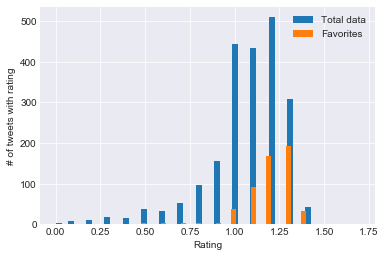

In [4]:
df['rating'].hist(bins=50, label='Total data')
df_favs['rating'].hist(bins=50, label='Favorites')

plt.xlabel('Rating')
plt.ylabel('# of tweets with rating')
plt.legend();

Within the favorites DataFrame the most common rating is 1.3 or 13 out of 10, within the entire dataset 12 out of 10 is the most common with 11 out of 10 and 10 out of 10 also being high.

### 4.3 Insight 2: Which dog breed do we love?
Of the most common dog breeds in the WeRateDogs archive, which ones get the most retweets and favorites?

In [5]:
# Defining a function to calculate the mean values of different columns
def calc_mean(lst_breeds, clmn):
    height = [df[clmn].mean()]
    
    for b in lst_breeds:
        _str = b[:3]
        df_str = df[df['breed_p1'] == b ][clmn].mean()
        height.append(df_str)
        
    return height

In [40]:
# Defining a function to create bar charts of the mean values
def bar_breeds(lst_breeds, height, clmn):
    locations = [1, 2, 3, 4, 5, 6, 7, 8]
    colors = ['dimgrey', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'orange']
    
    heights = height
    t_labels = ['Total \n dataset', 'Golden \n Retriever', 'Pembroke', 'Lab \n Retriever', 'Chihuahua', 
            'Pug', 'Chow', 'Samoyed']
    
    plt.bar(locations, heights, tick_label=t_labels, color=colors)
    plt.title('Average {} for top breeds'.format(clmn[:-6]))
    plt.ylabel('Average {}'.format(clmn[:-6]))
    plt.tight_layout();
    
    fig = plt.gcf()
    
    # print all the graphs
    plt.show()
    
    #save image 
    fig.savefig(clmn[:-6], bbox_inches = 'tight')

In [25]:
def main():
    for c in lst_cols:
        height = calc_mean(lst_breeds, c)
        bar_breeds(lst_breeds, height, c)

In [48]:
df['breed_p1'].value_counts().head(7)

Golden_retriever      142
Labrador_retriever     96
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Name: breed_p1, dtype: int64

In [26]:
lst_breeds = ['Golden_retriever', 'Pembroke', 'Labrador_retriever', 'Chihuahua', 'Pug', 'Chow', 'Samoyed']
lst_cols = ['retweet_count', 'favorite_count']

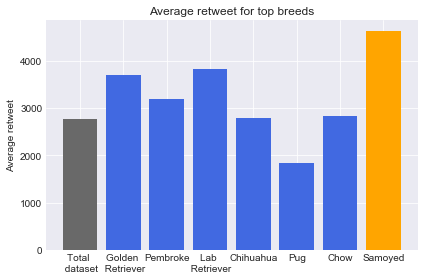

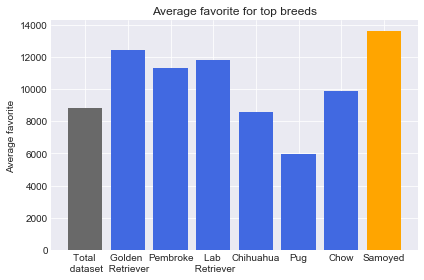

In [41]:
main()

Samoyed are the most popular with golden and lab retrievers comming in second.

#### Dog stages
After looking at the breeds, what can be said about the different dog stages: `doggo, pupper, puppo, floofer`.

In [51]:
# Calculating the mean values for different stages
lst_stages = ['doggo', 'pupper', 'puppo', 'floofer']
h = [df['retweet_count'].mean()]

for s in lst_stages:
    _str = s[:3]
    df_str = df[df['stage'] == s ]['retweet_count'].mean()
    h.append(df_str)

h

[2775.0013780431786, 6189.6551724137935, 2525.137339055794, 6847.04, 4083.6]

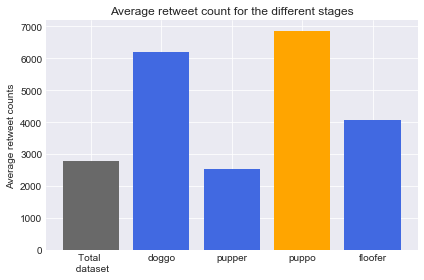

In [52]:
# Create a bar chart to compare across stages
locations = [1, 2, 3, 4, 5]
colors = ['dimgrey', 'royalblue', 'royalblue' ,'orange', 'royalblue']
heights = h
t_labels = ['Total \n dataset', 'doggo', 'pupper', 'puppo', 'floofer']
plt.bar(locations, heights, tick_label=t_labels, color=colors)
plt.title('Average retweet count for the different stages')
plt.ylabel('Average retweet counts')
plt.tight_layout();

The puppo is the most successful one of the 4 stages. Over all it seems like having a stange in the text  rewards you with more retweets.

### 4.4 Insight 3: Our Favorites

As a final insight, the favorite dog is determined by looking at the top favorite counts and cross-checking with the number of retweets.
<br><br>
With the Samoyed breed preforming so well, as seen in insight 2, the top picture of a Samoyed is also identified.

In [59]:
df['favorite_count'].sort_values(ascending=False).head()

346    132810
864    131075
63     107956
444    107015
119    106827
Name: favorite_count, dtype: int64

In [60]:
df[df['favorite_count'] >  106827.0]

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
63,879415818425184262,2017-06-26,19:07:24,1.3,45849,107956,82,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/87941...,NaN,NaN
346,822872901745569793,2017-01-21,18:26:02,1.3,48265,132810,87,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,0,puppo
444,807106840509214720,2016-12-09,06:17:20,1.3,56625,107015,61,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/80710...,NaN,NaN
864,744234799360020481,2016-06-18,18:26:18,1.3,79515,131075,91,Labrador_retriever,https://pbs.twimg.com/ext_tw_video_thumb/74423...,0,doggo


In [61]:
df['retweet_count'].sort_values(ascending=False).head()

864    79515
444    56625
904    52360
346    48265
63     45849
Name: retweet_count, dtype: int64

Of the top 5 tweets with the highest favorite counts, tweet 822872901745569793 also has a high retweet value, making it a good choice for the favorite dog in the dataset.

In [62]:
# highest favorite count and high retweet
fav_dog = df[df['favorite_count'] == 132810.0]
fav_dog

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
346,822872901745569793,2017-01-21,18:26:02,1.3,48265,132810,87,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,0,puppo


In [63]:
# Extract url
fav_dog['jpg_url']

346    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [64]:
# Downloading it into a response variable
url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'
response = requests.get(url)
response

#downloading into a seperate file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

This is the winner, highest favorite count and retweets is this puppo:

<img src="C2tugXLXgAArJO4.jpg" width=200px>


#### Samoyed
The Samoyed preformed better than the other popular breeds. Therefor the top picture of a Samoyed will also be downloaded.

In [65]:
df_sam = df.query('breed_p1 == "Samoyed"')
df_sam.head()

,tweet_id,date,time,rating,retweet_count,favorite_count,tweet_length,breed_p1,jpg_url,name,stage
10,890006608113172480,2017-07-26,00:31:25,1.3,7624,31166,130,Samoyed,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,NaN,NaN
24,887101392804085760,2017-07-18,00:07:08,1.2,6167,31061,129,Samoyed,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,NaN,NaN
53,881536004380872706,2017-07-02,15:32:16,1.4,16570,50199,130,Samoyed,https://pbs.twimg.com/ext_tw_video_thumb/88153...,0,pupper
116,867051520902168576,2017-05-23,16:16:06,1.3,8425,33420,132,Samoyed,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,NaN,NaN
120,866334964761202691,2017-05-21,16:48:45,1.2,15546,54720,112,Samoyed,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg,NaN,NaN


In [66]:
df_sam['favorite_count'].max()

54720

In [67]:
df_sam.query('favorite_count == 54720')['jpg_url']

120    https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg
Name: jpg_url, dtype: object

In [68]:
# Downloading it into a response variable
url = 'https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg'
response = requests.get(url)
response

#downloading into a seperate file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

This provides us with the following picture of the favorite Samoyed:

<img src="DAXXDQNXgAAoYQH.jpg" width=200px>
